<a href="https://colab.research.google.com/github/beratcmn/tensorflow-quickdraw-recognition/blob/main/doodle_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries

In [1]:
!pip install quickdraw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization


from pathlib import Path
from quickdraw import QuickDrawDataGroup
from matplotlib import pyplot as plt

tf.__version__

'2.11.0'

### Getting the doodles

In [3]:
image_size = (64, 64)
categories = ["airplane", "apple", "bicycle", "car", "cat", "cloud", "dog", "hamburger", "fish", "flower", "banana", "bird", "eye", "fork", "hat"]
max_drawings = 5000

def generate_class_images(name, max_drawings, recognized):
    directory = Path("data/" + name)

    if not directory.exists():
        directory.mkdir(parents=True)

    images = QuickDrawDataGroup(name, max_drawings=max_drawings, recognized=recognized)
    for img in images.drawings:
        filename = directory.as_posix() + "/" + str(img.key_id) + ".png"
        img.get_image(stroke_width=3).resize(image_size).save(filename)

for label in categories:
    generate_class_images(label, max_drawings=max_drawings, recognized=True)

downloading airplane from https://storage.googleapis.com/quickdraw_dataset/full/binary/airplane.bin
download complete
loading airplane drawings
load complete
downloading apple from https://storage.googleapis.com/quickdraw_dataset/full/binary/apple.bin
download complete
loading apple drawings
load complete
downloading bicycle from https://storage.googleapis.com/quickdraw_dataset/full/binary/bicycle.bin
download complete
loading bicycle drawings
load complete
downloading car from https://storage.googleapis.com/quickdraw_dataset/full/binary/car.bin
download complete
loading car drawings
load complete
downloading cat from https://storage.googleapis.com/quickdraw_dataset/full/binary/cat.bin
download complete
loading cat drawings
load complete
downloading cloud from https://storage.googleapis.com/quickdraw_dataset/full/binary/cloud.bin
download complete
loading cloud drawings
load complete
downloading dog from https://storage.googleapis.com/quickdraw_dataset/full/binary/dog.bin
download comp

### Creating the datasets

In [5]:
batch_size = 32

train_dataset = image_dataset_from_directory(
    "data",
    validation_split=0.2,
    subset="training",
    seed=123,
    color_mode="grayscale",
    image_size=image_size,
    batch_size=batch_size
)

validation_dataset = image_dataset_from_directory(
    "data",
    validation_split=0.2,
    subset="validation",
    seed=123,
    color_mode="grayscale",
    image_size=image_size,
    batch_size=batch_size
)

Found 75000 files belonging to 15 classes.
Using 60000 files for training.
Found 75000 files belonging to 15 classes.
Using 15000 files for validation.


### Understanding the data

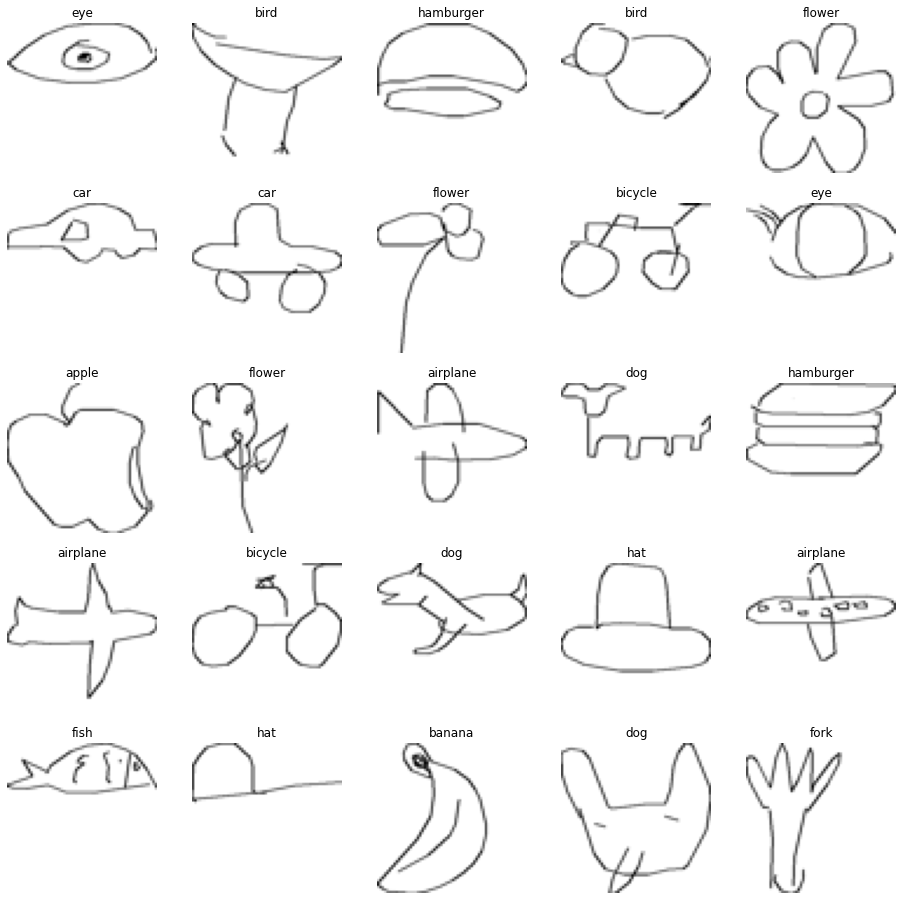

In [18]:
plt.figure(figsize=(16, 16))
for images, labels in train_dataset.take(1):
  for i in range(25):
    plt.subplot(5,5,i+1)
    data = images[i].numpy().astype("uint8")
    plt.imshow(data, cmap='gray', vmin=0, vmax=255)
    plt.title(train_dataset.class_names[labels[i]])
    plt.axis("off")

### Creating a test model

In [19]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=image_size),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(len(categories))
])

### Compiling the test model

In [20]:
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the test model

In [22]:
epochs = 30

model_1.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = epochs
)

model_1.save("./models/test_model_1")

Epoch 1/30
1875/1875 [==============================] - 16s 9ms/step - loss: 2.7082 - accuracy: 0.0662 - val_loss: 2.7084 - val_accuracy: 0.0657
Epoch 2/30
1875/1875 [==============================] - 16s 8ms/step - loss: 2.7083 - accuracy: 0.0662 - val_loss: 2.7084 - val_accuracy: 0.0657
Epoch 3/30
1875/1875 [==============================] - 17s 9ms/step - loss: 2.7083 - accuracy: 0.0662 - val_loss: 2.7084 - val_accuracy: 0.0657
Epoch 4/30
1875/1875 [==============================] - 16s 8ms/step - loss: 2.7083 - accuracy: 0.0661 - val_loss: 2.7084 - val_accuracy: 0.0657
Epoch 5/30
1875/1875 [==============================] - 16s 8ms/step - loss: 2.7083 - accuracy: 0.0664 - val_loss: 2.7084 - val_accuracy: 0.0657
Epoch 6/30
1875/1875 [==============================] - 16s 8ms/step - loss: 2.7083 - accuracy: 0.0663 - val_loss: 2.7084 - val_accuracy: 0.0657
Epoch 7/30
1875/1875 [==============================] - 16s 9ms/step - loss: 2.7083 - accuracy: 0.0660 - val_loss: 2.7084 - val_ac

### Creating a second test model

In [32]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=image_size),
    tf.keras.layers.Dense(2560, activation='relu'),
    tf.keras.layers.Dense(1280, activation='relu'),
    tf.keras.layers.Dense(640, activation='relu'),
    tf.keras.layers.Dense(320, activation='relu'),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(categories), activation=tf.nn.softmax)
])

### Compiling the model_2

In [33]:
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model 2

In [34]:
epochs = 32

model_2.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = epochs
)

model_2.save("./models/test_model_2")

Epoch 1/32
1875/1875 [==============================] - 22s 10ms/step - loss: 14.0917 - accuracy: 0.0667 - val_loss: 2.7087 - val_accuracy: 0.0674
Epoch 2/32
1875/1875 [==============================] - 18s 9ms/step - loss: 2.7460 - accuracy: 0.0667 - val_loss: 2.7085 - val_accuracy: 0.0657
Epoch 3/32
1875/1875 [==============================] - 19s 10ms/step - loss: 2.7083 - accuracy: 0.0663 - val_loss: 2.7085 - val_accuracy: 0.0657
Epoch 4/32
1875/1875 [==============================] - 19s 10ms/step - loss: 2.7083 - accuracy: 0.0661 - val_loss: 2.7085 - val_accuracy: 0.0657
Epoch 5/32
1875/1875 [==============================] - 18s 10ms/step - loss: 2.7083 - accuracy: 0.0662 - val_loss: 2.7085 - val_accuracy: 0.0657
Epoch 6/32
1875/1875 [==============================] - 19s 10ms/step - loss: 2.7083 - accuracy: 0.0663 - val_loss: 2.7085 - val_accuracy: 0.0657
Epoch 7/32
1875/1875 [==============================] - 18s 10ms/step - loss: 2.7083 - accuracy: 0.0661 - val_loss: 2.7085 -

### Creating the test model 3

In [44]:
model_3 = tf.keras.Sequential([
    Rescaling(1. / 255, input_shape=(64, 64, 1)),
    BatchNormalization(),

    Conv2D(6, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(8, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(10, kernel_size=(3, 3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(700, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),

    Dense(500, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),

    Dense(400, activation="relu"),
    Dropout(0.2),

    Dense(len(categories), activation="softmax")
])

### Compiling the model 3

In [45]:
model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model 3

In [46]:
epochs = 32

model_3.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = epochs
)

model_3.save("./models/test_model_3")

Epoch 1/32


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 36s 14ms/step - loss: 0.6548 - accuracy: 0.8049 - val_loss: 0.4244 - val_accuracy: 0.8745
Epoch 2/32
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3589 - accuracy: 0.8896 - val_loss: 0.3555 - val_accuracy: 0.8905
Epoch 3/32
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2636 - accuracy: 0.9163 - val_loss: 0.9797 - val_accuracy: 0.7807
Epoch 4/32
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1974 - accuracy: 0.9373 - val_loss: 0.3939 - val_accuracy: 0.8944
Epoch 5/32
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1627 - accuracy: 0.9470 - val_loss: 0.4303 - val_accuracy: 0.8961
Epoch 6/32
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1274 - accuracy: 0.9597 - val_loss: 0.4143 - val_accuracy: 0.9035
Epoch 7/32
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1123 - accuracy: 0.9642 - val_loss: 0.4422 - val_accura

### Downloading any model

In [52]:
!zip -r models/models.zip  models/

  adding: models/ (stored 0%)
  adding: models/test_model_1/ (stored 0%)
  adding: models/test_model_1/saved_model.pb (deflated 87%)
  adding: models/test_model_1/variables/ (stored 0%)
  adding: models/test_model_1/variables/variables.index (deflated 57%)
  adding: models/test_model_1/variables/variables.data-00000-of-00001 (deflated 46%)
  adding: models/test_model_1/assets/ (stored 0%)
  adding: models/test_model_1/fingerprint.pb (stored 0%)
  adding: models/test_model_1/keras_metadata.pb (deflated 84%)
  adding: models/test_model_3/ (stored 0%)
  adding: models/test_model_3/saved_model.pb (deflated 89%)
  adding: models/test_model_3/variables/ (stored 0%)
  adding: models/test_model_3/variables/variables.index (deflated 68%)
  adding: models/test_model_3/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: models/test_model_3/assets/ (stored 0%)
  adding: models/test_model_3/fingerprint.pb (stored 0%)
  adding: models/test_model_3/keras_metadata.pb (deflated 93%)
  addin

In [54]:
from google.colab import files
files.download("models/models.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>